# 0. Setup Paths

In [5]:
import os

In [6]:
# setting up our pretrain model variable

#cluster model folder
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'

In [7]:
#setting up the name of our pre train model, this include the name of the file from the pre train TensorFlow 2 Detection Model Zoo
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'

In [8]:
# downloading model from the tensorflow model zoo 
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'

In [9]:
 #setting up variables
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [10]:
#creating our path for working folder
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'), # high level workspace
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'), # where TF record file will be stored
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'), # folder for the selected models tested
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), # selection of the working model
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [11]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [60]:
#creating our folders
for path in paths.values():
    if not os.path.exists(path):
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [24]:
# https://www.tensorflow.org/install/source_windows

In [25]:
!pip install wget

In [61]:
import wget

In [62]:
!git config --global core.longpaths true

In [63]:
#Cloning the TensorFlow model garden (TF2) to the folder 'models'
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [64]:
# Install Protocol buffers

url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
wget.download(url)
!move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
!cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   


 73% [......................................................                    ] 1081344 / 1468733

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.


In [65]:
 # Install Tensorflow Object Detection API(for windows)
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
!cd Tensorflow/models/research/slim && pip install -e . 

        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\flexible_grid_a

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-37: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-37: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-37: module MAY be using inspect.stack
Traceback (most recent call last):
  File "C:\Users\poopo\Documents\Tensor flow object detection\TFODFace2\tfod3\lib\site-packages\setuptools\sandbox.py", line 154, in save_modules
    yield saved
  File "C:\Users\poopo\Documents\Tensor flow object detection\TFODFace2\tfod3\lib\site-packages\setuptools\sandbox.py", line 195, in setup_context
    yield
  File "C:\Users\poopo\Documents\Tensor flow object detection\TFODFace2\tfod3\lib\site-packages\setuptools\sandbox.py", line 250, in run_setup
    _execfile(setup_script, ns)
  File "C:\Users\poopo\Documents\Tensor flow object detection\TFODFace2\tfod3\lib\site-packages\setuptools\sandbox.py", line 45, in _execfi

copying build\lib\object_detection\predictors\heads\mask_head_tf1_test.py -> build\bdist.win-amd64\egg\object_detection\predictors\heads
copying build\lib\object_detection\predictors\heads\__init__.py -> build\bdist.win-amd64\egg\object_detection\predictors\heads
copying build\lib\object_detection\predictors\mask_rcnn_box_predictor.py -> build\bdist.win-amd64\egg\object_detection\predictors
copying build\lib\object_detection\predictors\mask_rcnn_box_predictor_tf1_test.py -> build\bdist.win-amd64\egg\object_detection\predictors
copying build\lib\object_detection\predictors\mask_rcnn_keras_box_predictor.py -> build\bdist.win-amd64\egg\object_detection\predictors
copying build\lib\object_detection\predictors\mask_rcnn_keras_box_predictor_tf2_test.py -> build\bdist.win-amd64\egg\object_detection\predictors
copying build\lib\object_detection\predictors\rfcn_box_predictor.py -> build\bdist.win-amd64\egg\object_detection\predictors
copying build\lib\object_detection\predictors\rfcn_box_predic

Obtaining file:///C:/Users/poopo/Documents/Tensor%20flow%20object%20detection/TFODFace2/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [66]:
#Making path to your verification script
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')


In [67]:
# Verify Installation of the tensorflow model detection API
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.7.7: C:\Users\poopo\Documents\Tensor flow object detection\TFODFace2\tfod3\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-02-10 13:27:51.245503: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-10 13:27:51.831270: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2147 MB memory:  -> device: 0, name: GeForce GTX 1650 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5
C:\Users\poopo\Documents\Tensor flow object detection\TFODFace2\tfod3\lib\site-packages\object_detection-0.1-py3.7.egg\object_detection\builders\model_builder.py:1100: DeprecationWarning: The 'wa

All modules below were required to get the 'OK' from the verification script

In [33]:
!pip install pyyaml

In [ ]:
!pip install matplotlib

In [ ]:
!apt-get install python-scipy

In [ ]:
!pip install install tensorflow==2.7

In [ ]:
!pip install protobuf matplotlib==3.2

In [34]:
import object_detection

In [37]:
!pip list

Package                       Version   Editable project location
----------------------------- --------- -----------------------------------------------------------------------------------------------
absl-py                       0.15.0
apache-beam                   2.36.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
astunparse                    1.6.3
attrs                         21.4.0
avro-python3                  1.10.2
backcall                      0.2.0
bleach                        4.1.0
cachetools                    5.0.0
certifi                       2021.10.8
cffi                          1.15.0
charset-normalizer            2.0.11
colorama                      0.4.4
contextlib2                   21.6.0
cycler                        0.11.0
Cython                        0.29.27
debugpy                       1.5.1
decorator                     5.1.1
defusedxml                    0.7.1
entrypoints                   0.4
flatbuffers                 

In [68]:
# downloading model
# the model is cloned into your folder /workspace/pre-trained model
# un-tar the file
!wget {PRETRAINED_MODEL_URL}
!mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}


'wget' is not recognized as an internal or external command,
operable program or batch file.
'mv' is not recognized as an internal or external command,
operable program or batch file.
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [69]:
#creating a map to the label in a text file 
label_list = [{'name':'face', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in label_list:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [97]:
# creating a TF record
# cloning the script from a github repo
# the script will convert the image label and annotation to a file format useable by tensor flow
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/DiversityDatabaseProject/Diversity/tree/main/TFrecord_Generator {paths['SCRIPTS_PATH']}

In [84]:
!pip install pandas

In [98]:
# Create train data:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 



Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record


In [99]:
# Create test data:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


In [100]:
#Copy our model configs (from the pipeline.config file) to the training forlder
!copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 4. Configure the Training Pipeline

In [101]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [102]:
#We are opening up the config file for the TF model
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [103]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [104]:
#Using protocol buffer to process the config file

#Reads config from a file containing pipeline_pb2.TrainEvalPipelineConfig.
#Args: pipeline_config_path: Path to pipeline_pb2.TrainEvalPipeline Config text proto.
#config_override: A pipeline_pb2.TrainEvalPipelineConfig text proto to override pipeline_config_path.

#Script from: https://github.com/tensorflow/models/blob/master/research/object_detection/utils/config_util.py 

pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [105]:
#Configure  pipeline_config file
#Dictionary of configuration objects. Keys are `model`, `train_config`, `train_input_config`, `eval_config`, `eval_input_config`. 
#Value are the corresponding config objects.
pipeline_config.model.ssd.num_classes = len(label_list)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [106]:
# write a new pipeline config file
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:   #open for writing in binary mode                                                                                                                                                                                                                   
    f.write(config_text)   

# 5. Train the model

In [107]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [108]:
#running the model_main_tf2.py file
#Passing our model directory with the pipeline_config file
#select the number of steps

command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [109]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=10000


In [ ]:
#!pip install tensorflow-gpu==2.7.0
!pip install pycocotools

In [ ]:
#!pip install gin-config==0.1.1

In [65]:
!{command}

'{command}' is not recognized as an internal or external command,
operable program or batch file.


# 6. Evaluate the Model

In [51]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [52]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [ ]:
!{command}

# 8. Load Train Model From Checkpoint

In [23]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [24]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
# Selecting our most train model
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    """Detect objects in image."""
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [25]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
# select our face label
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [96]:
# Reset image path
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test_jupyter', 'istockphoto_866684340.jpg')

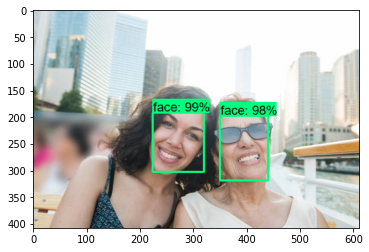

In [97]:
# Loading image into python
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

# Converting image to a tensor and the detection function 
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# Detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=8,
            min_score_thresh=.9,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()